# Analysis of the Impact of the IRA on Washington State Loads


In [1]:
# Start by importing the packages we need:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Set the Directory Structure

In [2]:
# Identify the top-level directory and the subdirectory where the data will be stored:
data_input_dir =  '/Users/burl878/Documents/Code/code_repos/load_analysis/data/'
image_output_dir =  '/Users/burl878/Documents/Code/code_repos/load_analysis/figures/WA/'


## Read in the File Processed by Travis

In [3]:
# Read in the already processed file:
load_df = pd.read_csv((os.path.join(data_input_dir, 'GODEEEP_GCAM-USA_WA_Loads_TWh.csv')))            
                  
# Preview the dataframe:
load_df


,scenario,year,region,units,non-transportation_load,transportation_load,total_load
0,BAU_Climate,1975,WA,TWh,29.185023,0.002111,29.187135
1,BAU_Climate,1990,WA,TWh,100.630914,0.014977,100.645891
2,BAU_Climate,2005,WA,TWh,92.525157,0.001547,92.526704
3,BAU_Climate,2010,WA,TWh,99.127302,0.006168,99.133469
4,BAU_Climate,2015,WA,TWh,97.443439,0.006401,97.449840
5,BAU_Climate,2020,WA,TWh,103.013138,0.078491,103.091629
6,BAU_Climate,2025,WA,TWh,120.409263,3.367864,123.777127
7,BAU_Climate,2030,WA,TWh,128.607325,7.783506,136.390831
8,BAU_Climate,2035,WA,TWh,132.235384,12.083593,144.318977
9,BAU_Climate,2040,WA,TWh,139.657334,15.964985,155.622319


In [63]:
# Define a function to plot the time series of annual demand for the state of Washington:
def plot_wa_load_time_series(data_input_dir: str, image_output_dir: str, image_resolution: int, save_images=False):
    
    # Read in the already processed file:
    load_df = pd.read_csv((os.path.join(data_input_dir, 'GODEEEP_GCAM-USA_WA_Loads_TWh.csv')))
    
    # Subset to the time series for each scenario:
    historic_df = load_df[(load_df['scenario'] == 'BAU_Climate') & (load_df['year'] < 2020)].copy()
    bau_climate_df = load_df[(load_df['scenario'] == 'BAU_Climate') & (load_df['year'] >= 2020)].copy()
    nz_noccs_climate_df = load_df[(load_df['scenario'] == 'NetZeroNoCCS_Climate') & (load_df['year'] >= 2020)].copy()
    bau_ira_ccs_climate_df = load_df[(load_df['scenario'] == 'business_as_usual_ira_ccs_climate') & (load_df['year'] >= 2020)].copy()
    nz_ira_ccs_climate_df = load_df[(load_df['scenario'] == 'net_zero_ira_ccs_climate') & (load_df['year'] >= 2020)].copy()
    
    # Make the raw load plots:
    plt.figure(figsize=(24, 12))
    plt.rcParams['font.size'] = 21
    
    plt.plot(bau_climate_df['year'], bau_climate_df['total_load'], color='black', linestyle='-', label='Business-As-Usual (No IRA)', linewidth=3)
    plt.plot(bau_ira_ccs_climate_df['year'], bau_ira_ccs_climate_df['total_load'], color='green', linestyle='-', label='Business-As-Usual With the IRA', linewidth=3)
    plt.plot(nz_noccs_climate_df['year'], nz_noccs_climate_df['total_load'], color='blue', linestyle='-', label='Net Zero (No IRA)', linewidth=3)
    plt.plot(nz_ira_ccs_climate_df['year'], nz_ira_ccs_climate_df['total_load'], color='magenta', linestyle='-', label='Net Zero With the IRA', linewidth=3)
    plt.xlim([2020, 2050]); plt.xticks([2020, 2025, 2030, 2035, 2040, 2045, 2050],['2020','2025','2030','2035','2040','2045','2050'])
    plt.legend(loc='upper left', prop={'size': 18})
    plt.ylabel('Annual Total Load [TWh]')
    plt.grid(True)
    plt.title('Washington Load Projections')
    
    # If the "save_images" flag is set to true then save the plot to a .png file:
    if save_images == True:
       filename = ('Washington_Loads.png')
       plt.savefig(os.path.join(image_output_dir, filename), dpi=image_resolution, bbox_inches='tight', facecolor='white')
           

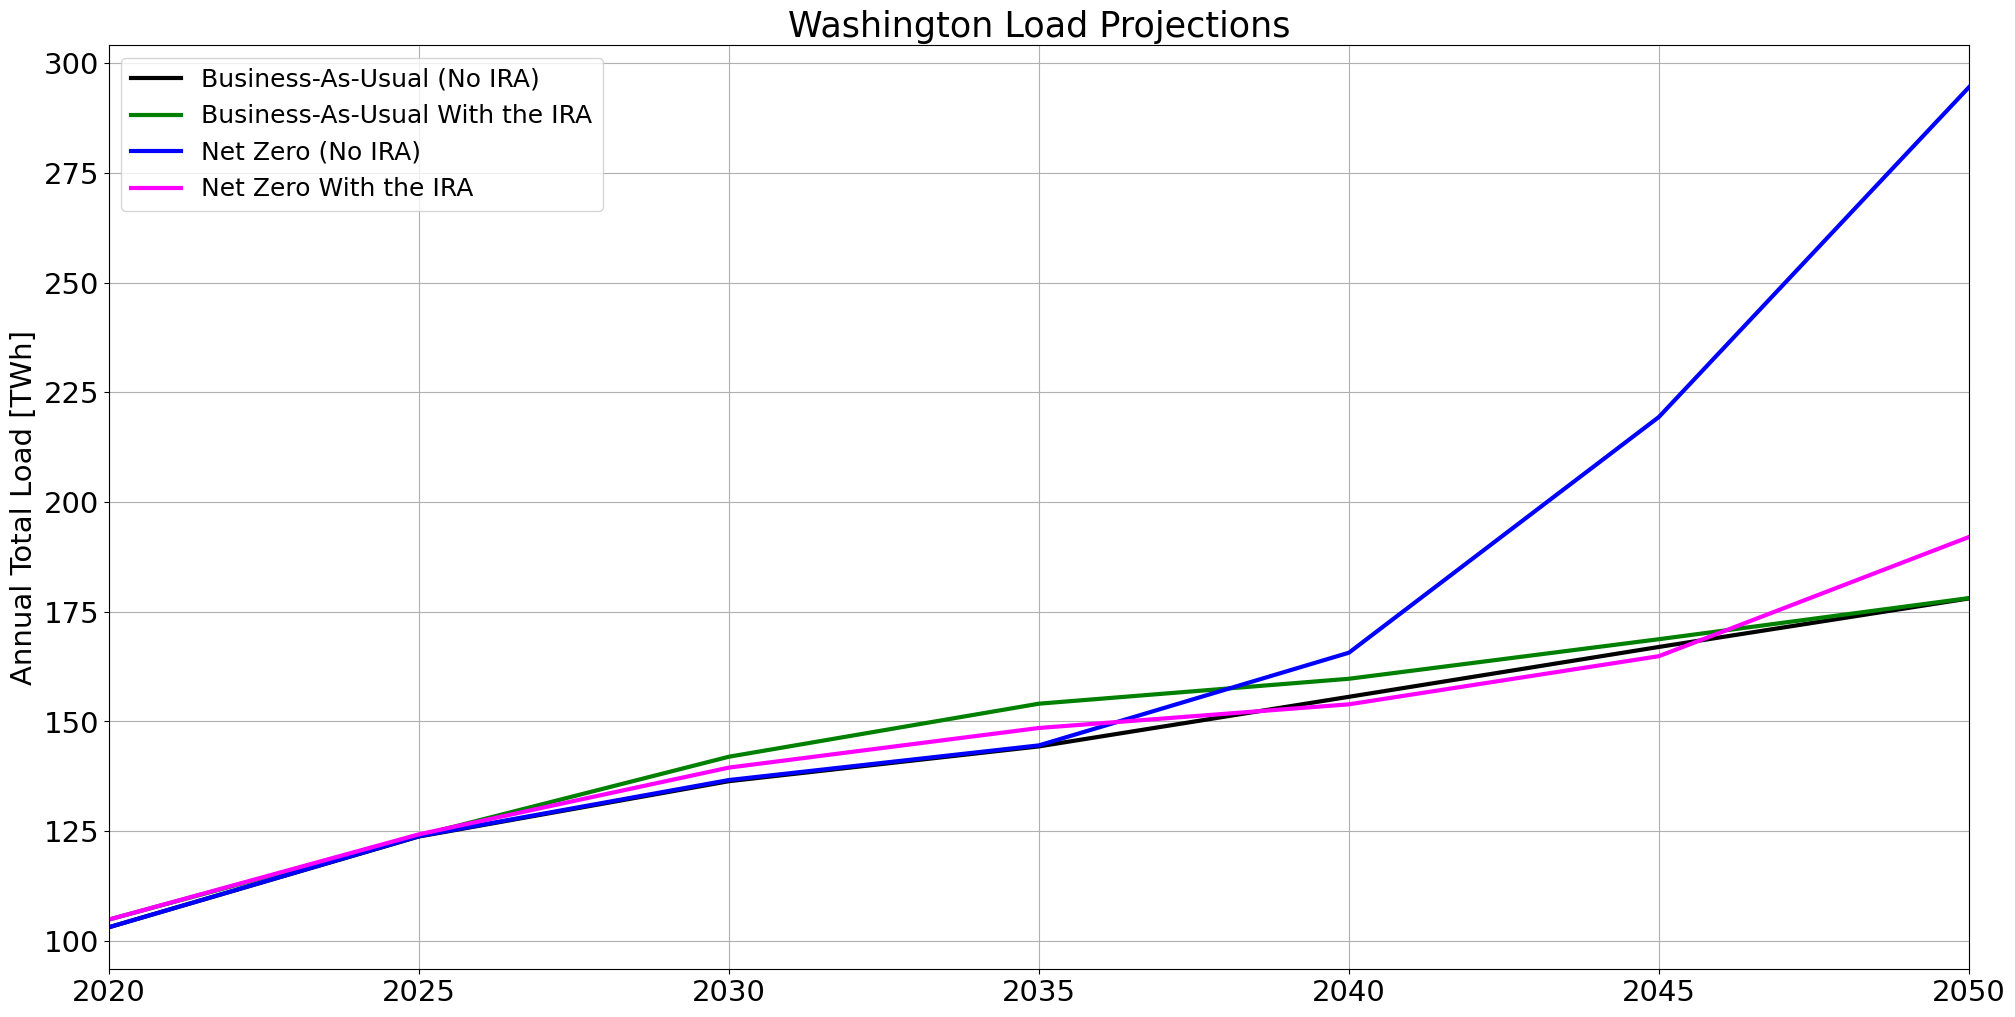

In [64]:
plot_wa_load_time_series(data_input_dir = data_input_dir, 
                         image_output_dir = image_output_dir, 
                         image_resolution = 300, 
                         save_images = True)
